In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [23]:
df_b_wt = pd.read_excel('Oz2_OzON_RT2_500_brainWT_12dec23.xlsx')
df_b_5x = pd.read_excel('Oz2_OzON_RT2_500_brain5xFAD_12dec23.xlsx')
df_liver = pd.read_excel('Oz2_OzON_RT2_500_LIVER_12dec23.xlsx')
df = pd.concat([df_b_wt, df_b_5x, df_liver])
#print len sum of all dataframes
print(len(df_b_wt) + len(df_b_5x) + len(df_liver))
#drop Cluster_Label and Group columns
df = df.drop(['Cluster_Label', 'Group', 'LipidParent_Ion', 'Transition'], axis=1)
#drop unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

491


,Lipid,Sample_ID,db_pos,Product_Ion,Retention_Time,OzESI_Intensity,Parent_Ion
0,[TG(50:3)]_FA18:1,11282023_DOD94_F3_WT_cereb_O3on_01,n-9,547.5,13.32,559,736.7
1,[TG(50:3)]_FA18:1,11282023_DOD94_F3_WT_dienc_O3on_01,n-9,547.5,13.32,1334,736.7
2,[TG(50:3)]_FA18:1,11282023_DOD94_F3_WT_hippo_O3on_01,n-9,547.5,13.36,667,736.7
3,[TG(50:3)]_FA18:1,11282023_FAD184_F3_WT_cortex_O3on_01,n-9,547.5,13.23,2524,736.7
4,[TG(50:3)]_FA18:1,11282023_FAD184_F3_WT_dienc_O3on_01,n-9,547.5,13.18,686,736.7
...,...,...,...,...,...,...,...
179,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,655.5,16.04,770,844.7
180,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,655.5,16.04,619,844.7
181,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD173_M1_5xFAD_liver_O3on_01,n-9,655.5,16.04,642,844.7
182,"[TG(59:13),TG(58:6)]_FA18:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,653.5,15.51,1293,842.7


In [3]:
#Print unique of group Lipid and db_pos
print(df['Lipid'].unique())
print(df['db_pos'].unique())


['[TG(50:3)]_FA18:1' '[TG(52:5)]_FA16:1' '[TG(54:5)]_FA18:1'
 '[TG(54:6)]_FA18:1' '[TG(55:10),TG(54:3)]_FA18:1'
 '[TG(55:11),TG(54:4)]_FA18:1' '[TG(55:8),TG(54:1)]_FA18:1'
 '[TG(55:9),TG(54:2)]_FA18:1' '[TG(56:7),TG(55:0)]_FA18:1'
 '[TG(57:10),TG(56:3)]_FA18:1' '[TG(57:11),TG(56:4)]_FA18:1'
 '[TG(57:9),TG(56:2)]_FA18:1' '[TG(52:6)]_FA18:2'
 '[TG(52:7),TG(51:0)]_FA18:1' '[TG(55:11),TG(54:4)]_FA16:1'
 '[TG(56:10),TG(55:3)]_FA18:1' '[TG(56:11),TG(55:4)]_FA18:1'
 '[TG(56:6)]_FA18:1' '[TG(56:7),TG(55:0)]_FA16:1'
 '[TG(57:12),TG(56:5)]_FA18:1' '[TG(58:7),TG(57:0)]_FA18:1'
 '[TG(59:11),TG(58:4)]_FA18:1' '[TG(59:12),TG(58:5)]_FA18:1'
 '[TG(59:13),TG(58:6)]_FA18:1']
['n-9' 'n-7' 'n-10']


Add Liver Brain label

In [4]:

# Define function to extract biology term
def extract_biology(sample_id):
    for term in ["liver", "cortex", "cereb", "hippo", "dienc"]:
        if term in sample_id.lower():
            return term
    return None

# Apply function to create new column
df['Biology'] = df['Sample_ID'].apply(extract_biology)
df['Genotype'] = df['Sample_ID'].apply(lambda x: '5xFAD' if 'WT' not in x else 'WT')

# df.to_csv('df_for_gpt.csv')

# Extracting the mouse name from the 'Sample_ID' column
df['Mouse'] = df['Sample_ID'].apply(lambda x: '_'.join(x.split('_')[1:3]))
df.to_csv('FF_df_withBioGenoMouse.csv')
df

,Lipid,Sample_ID,db_pos,Product_Ion,Retention_Time,OzESI_Intensity,Parent_Ion,Biology,Genotype,Mouse
0,[TG(50:3)]_FA18:1,11282023_DOD94_F3_WT_cereb_O3on_01,n-9,547.5,13.32,559,736.7,cereb,WT,DOD94_F3
1,[TG(50:3)]_FA18:1,11282023_DOD94_F3_WT_dienc_O3on_01,n-9,547.5,13.32,1334,736.7,dienc,WT,DOD94_F3
2,[TG(50:3)]_FA18:1,11282023_DOD94_F3_WT_hippo_O3on_01,n-9,547.5,13.36,667,736.7,hippo,WT,DOD94_F3
3,[TG(50:3)]_FA18:1,11282023_FAD184_F3_WT_cortex_O3on_01,n-9,547.5,13.23,2524,736.7,cortex,WT,FAD184_F3
4,[TG(50:3)]_FA18:1,11282023_FAD184_F3_WT_dienc_O3on_01,n-9,547.5,13.18,686,736.7,dienc,WT,FAD184_F3
...,...,...,...,...,...,...,...,...,...,...
179,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,655.5,16.04,770,844.7,liver,5xFAD,FAD131_M1
180,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,655.5,16.04,619,844.7,liver,5xFAD,FAD131_M2
181,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD173_M1_5xFAD_liver_O3on_01,n-9,655.5,16.04,642,844.7,liver,5xFAD,FAD173_M1
182,"[TG(59:13),TG(58:6)]_FA18:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,653.5,15.51,1293,842.7,liver,5xFAD,FAD131_M1


In [5]:
df['SLBG_group'] = df.groupby(['Lipid', 'Sample_ID','Biology','Genotype']).ngroup()
# df['Lipid_Biology_group'] = df.groupby(['Lipid', 'Biology']).ngroup()
# Filter for 'liver' in Biology
# liver_df = df[df['Biology'] == 'liver']
# # Filter the DataFrame for each of the brain biology values and concatenate them into one DataFrame
# brain_df = pd.concat([
#     df[df['Biology'] == 'cortex'],
#     df[df['Biology'] == 'cereb'],
#     df[df['Biology'] == 'hippo'],
#     df[df['Biology'] == 'dienc']
# ])
# brain_df

# # Group by Lipid and db_pos
# liver_df['SLBG_group'] = liver_df.groupby(['Lipid', 'Sample_ID','Biology','Genotype']).ngroup()
# brain_df['SLBG_group'] = brain_df.groupby(['Lipid', 'Sample_ID','Biology','Genotype']).ngroup()



# Assuming df is your DataFrame

# Step 1: Extract the last part of the Lipid name
df['Lipid_End'] = df['Lipid'].str.extract(r'(FA\d+:\d+)$')

# Step 2: Sort the DataFrame
# We'll sort by the new 'Lipid_End' column, and then by the original 'Lipid' column to maintain order within each group
df = df.sort_values(by=['Lipid_End', 'Lipid'], ascending=[True, True])

# If you specifically want 'FA16:1' to appear before 'FA18:1'
# You might need a custom sorting function or a categorical type for the 'Lipid_End' column
df['Lipid_End'] = pd.Categorical(df['Lipid_End'], categories=['FA16:1', 'FA18:1'], ordered=True)
df = df.sort_values(by=['Lipid_End', 'Lipid'])


df

,Lipid,Sample_ID,db_pos,Product_Ion,Retention_Time,OzESI_Intensity,Parent_Ion,Biology,Genotype,Mouse,SLBG_group,Lipid_End
14,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_cereb_O3on_01,n-7,599.5,12.02,673,788.7,cereb,WT,DOD94_F3,34,FA16:1
15,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_cortex_O3on_01,n-7,599.5,12.02,1126,788.7,cortex,WT,DOD94_F3,35,FA16:1
16,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_dienc_O3on_01,n-7,599.5,12.10,1567,788.7,dienc,WT,DOD94_F3,36,FA16:1
17,[TG(52:5)]_FA16:1,11282023_FAD184_F3_WT_cortex_O3on_01,n-7,599.5,12.02,3221,788.7,cortex,WT,FAD184_F3,37,FA16:1
18,[TG(52:5)]_FA16:1,11282023_FAD184_F3_WT_dienc_O3on_01,n-7,599.5,12.06,512,788.7,dienc,WT,FAD184_F3,38,FA16:1
...,...,...,...,...,...,...,...,...,...,...,...,...
180,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,655.5,16.04,619,844.7,liver,5xFAD,FAD131_M2,354,FA18:1
181,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD173_M1_5xFAD_liver_O3on_01,n-9,655.5,16.04,642,844.7,liver,5xFAD,FAD173_M1,355,FA18:1
182,"[TG(59:13),TG(58:6)]_FA18:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,653.5,15.51,1293,842.7,liver,5xFAD,FAD131_M1,356,FA18:1
183,"[TG(59:13),TG(58:6)]_FA18:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,653.5,15.55,1197,842.7,liver,5xFAD,FAD131_M2,357,FA18:1


copy df to df2 to do db calcuations

In [6]:
# Copying df2 to create df3
df2 = df.copy()
import pandas as pd

# Assuming df is your DataFrame
# Replace df with your actual DataFrame variable name if it's different

# Group by 'SLBG_group' and sum the 'OzESI_Intensity' for each group
# Assign the summed intensity back to each row in the original DataFrame
df2['total_intensity'] = df2.groupby('SLBG_group')['OzESI_Intensity'].transform('sum')



df2

,Lipid,Sample_ID,db_pos,Product_Ion,Retention_Time,OzESI_Intensity,Parent_Ion,Biology,Genotype,Mouse,SLBG_group,Lipid_End,total_intensity
14,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_cereb_O3on_01,n-7,599.5,12.02,673,788.7,cereb,WT,DOD94_F3,34,FA16:1,673
15,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_cortex_O3on_01,n-7,599.5,12.02,1126,788.7,cortex,WT,DOD94_F3,35,FA16:1,1126
16,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_dienc_O3on_01,n-7,599.5,12.10,1567,788.7,dienc,WT,DOD94_F3,36,FA16:1,1567
17,[TG(52:5)]_FA16:1,11282023_FAD184_F3_WT_cortex_O3on_01,n-7,599.5,12.02,3221,788.7,cortex,WT,FAD184_F3,37,FA16:1,3221
18,[TG(52:5)]_FA16:1,11282023_FAD184_F3_WT_dienc_O3on_01,n-7,599.5,12.06,512,788.7,dienc,WT,FAD184_F3,38,FA16:1,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,655.5,16.04,619,844.7,liver,5xFAD,FAD131_M2,354,FA18:1,619
181,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD173_M1_5xFAD_liver_O3on_01,n-9,655.5,16.04,642,844.7,liver,5xFAD,FAD173_M1,355,FA18:1,642
182,"[TG(59:13),TG(58:6)]_FA18:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,653.5,15.51,1293,842.7,liver,5xFAD,FAD131_M1,356,FA18:1,1293
183,"[TG(59:13),TG(58:6)]_FA18:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,653.5,15.55,1197,842.7,liver,5xFAD,FAD131_M2,357,FA18:1,1197


In [22]:
import pandas as pd

# Assuming df2 is your DataFrame
# Replace df2 with your actual DataFrame variable name if it's different

# Function to calculate n-9% for each row
def calculate_n9_percent(row):
    if row['db_pos'] == 'n-9':
        return (row['OzESI_Intensity'] / row['total_intensity']) * 100
    else:
        return 0  # Return 0 for rows where db_pos is not 'n-9'

# Apply the function to each row
df2['n-9%'] = df2.apply(calculate_n9_percent, axis=1)

# Rename df2 to df3 as per your requirement
df3 = df2.copy()
df3.to_excel('df3.xlsx')
#print unique of group Lipid and db_pos
print(df3['Lipid'].unique())
print(df3['db_pos'].unique())
#print cortex FAD 185
df3

['[TG(52:5)]_FA16:1' '[TG(55:11),TG(54:4)]_FA16:1'
 '[TG(56:7),TG(55:0)]_FA16:1' '[TG(50:3)]_FA18:1'
 '[TG(52:7),TG(51:0)]_FA18:1' '[TG(54:5)]_FA18:1' '[TG(54:6)]_FA18:1'
 '[TG(55:10),TG(54:3)]_FA18:1' '[TG(55:11),TG(54:4)]_FA18:1'
 '[TG(55:8),TG(54:1)]_FA18:1' '[TG(55:9),TG(54:2)]_FA18:1'
 '[TG(56:10),TG(55:3)]_FA18:1' '[TG(56:11),TG(55:4)]_FA18:1'
 '[TG(56:6)]_FA18:1' '[TG(56:7),TG(55:0)]_FA18:1'
 '[TG(57:10),TG(56:3)]_FA18:1' '[TG(57:11),TG(56:4)]_FA18:1'
 '[TG(57:12),TG(56:5)]_FA18:1' '[TG(57:9),TG(56:2)]_FA18:1'
 '[TG(58:7),TG(57:0)]_FA18:1' '[TG(59:11),TG(58:4)]_FA18:1'
 '[TG(59:12),TG(58:5)]_FA18:1' '[TG(59:13),TG(58:6)]_FA18:1'
 '[TG(52:6)]_FA18:2']
['n-7' 'n-9' 'n-10']
0


,Lipid,Sample_ID,db_pos,Product_Ion,Retention_Time,OzESI_Intensity,Parent_Ion,Biology,Genotype,Mouse,SLBG_group,Lipid_End,total_intensity,n-9%
14,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_cereb_O3on_01,n-7,599.5,12.02,673,788.7,cereb,WT,DOD94_F3,34,FA16:1,673,0.0
15,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_cortex_O3on_01,n-7,599.5,12.02,1126,788.7,cortex,WT,DOD94_F3,35,FA16:1,1126,0.0
16,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_dienc_O3on_01,n-7,599.5,12.10,1567,788.7,dienc,WT,DOD94_F3,36,FA16:1,1567,0.0
17,[TG(52:5)]_FA16:1,11282023_FAD184_F3_WT_cortex_O3on_01,n-7,599.5,12.02,3221,788.7,cortex,WT,FAD184_F3,37,FA16:1,3221,0.0
18,[TG(52:5)]_FA16:1,11282023_FAD184_F3_WT_dienc_O3on_01,n-7,599.5,12.06,512,788.7,dienc,WT,FAD184_F3,38,FA16:1,512,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,655.5,16.04,619,844.7,liver,5xFAD,FAD131_M2,354,FA18:1,619,100.0
181,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD173_M1_5xFAD_liver_O3on_01,n-9,655.5,16.04,642,844.7,liver,5xFAD,FAD173_M1,355,FA18:1,642,100.0
182,"[TG(59:13),TG(58:6)]_FA18:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,653.5,15.51,1293,842.7,liver,5xFAD,FAD131_M1,356,FA18:1,1293,100.0
183,"[TG(59:13),TG(58:6)]_FA18:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,653.5,15.55,1197,842.7,liver,5xFAD,FAD131_M2,357,FA18:1,1197,100.0


In [8]:
df4 = df3.copy()    
#drop all db_pos != n-9
df4 = df4[df4['db_pos'] == 'n-9']
df4.to_excel('df4.xlsx')
df4

,Lipid,Sample_ID,db_pos,Product_Ion,Retention_Time,OzESI_Intensity,Parent_Ion,Biology,Genotype,Mouse,SLBG_group,Lipid_End,total_intensity,n-9%
20,[TG(52:5)]_FA16:1,11282023_FAD185_M4_WT_cereb_O3on_01,n-9,599.5,12.07,2939,760.7,cereb,WT,FAD185_M4,39,FA16:1,29367,10.007832
22,[TG(52:5)]_FA16:1,11282023_FAD185_M4_WT_cortex_O3on_01,n-9,599.5,12.07,3054,760.7,cortex,WT,FAD185_M4,40,FA16:1,19950,15.308271
26,[TG(52:5)]_FA16:1,11282023_FAD189_M3_WT_cereb_O3on_01,n-9,599.5,12.07,1045,760.7,cereb,WT,FAD189_M3,43,FA16:1,7482,13.966854
28,[TG(52:5)]_FA16:1,11282023_FAD189_M3_WT_cortex_O3on_01,n-9,599.5,12.07,1638,760.7,cortex,WT,FAD189_M3,44,FA16:1,19093,8.579060
25,[TG(52:5)]_FA16:1,11292023_FAD189_M1_5xFAD_cereb_O3on_01,n-9,599.5,12.42,1812,760.7,cereb,5xFAD,FAD189_M1,54,FA16:1,29072,6.232801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,655.5,16.04,770,844.7,liver,5xFAD,FAD131_M1,353,FA18:1,770,100.000000
180,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,655.5,16.04,619,844.7,liver,5xFAD,FAD131_M2,354,FA18:1,619,100.000000
181,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD173_M1_5xFAD_liver_O3on_01,n-9,655.5,16.04,642,844.7,liver,5xFAD,FAD173_M1,355,FA18:1,642,100.000000
182,"[TG(59:13),TG(58:6)]_FA18:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,653.5,15.51,1293,842.7,liver,5xFAD,FAD131_M1,356,FA18:1,1293,100.000000


In [9]:
import pandas as pd

# Assuming df3 is your DataFrame
# Create a copy of df3 to df_brain
df_brain = df3.copy()
df_brain = df_brain[df_brain['Biology'] != 'liver']

# Filter to get rows where db_pos is 'n-9'
n_9_df = df_brain[df_brain['db_pos'] == 'n-9']

# Group by Lipid and Genotype, then calculate mean and std dev of n-9%
grouped = n_9_df.groupby(['Lipid', 'Genotype'])['n-9%'].agg(['mean', 'std']).reset_index()
grouped.rename(columns={'mean': 'n-9_avg', 'std': 'std_dev'}, inplace=True)

# Merge these calculated values back to df_brain
df_brain = df_brain.merge(grouped, on=['Lipid', 'Genotype'], how='left')

# Round the values to 1 decimal place
df_brain['n-9_avg'] = df_brain['n-9_avg'].round(1)
df_brain['std_dev'] = df_brain['std_dev'].round(1)

# Display the last 50 rows of the DataFrame to verify the results
df_brain.head(50)


,Lipid,Sample_ID,db_pos,Product_Ion,Retention_Time,OzESI_Intensity,Parent_Ion,Biology,Genotype,Mouse,SLBG_group,Lipid_End,total_intensity,n-9%,n-9_avg,std_dev
0,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_cereb_O3on_01,n-7,599.5,12.02,673,788.7,cereb,WT,DOD94_F3,34,FA16:1,673,0.000000,12.0,3.2
1,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_cortex_O3on_01,n-7,599.5,12.02,1126,788.7,cortex,WT,DOD94_F3,35,FA16:1,1126,0.000000,12.0,3.2
2,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_dienc_O3on_01,n-7,599.5,12.10,1567,788.7,dienc,WT,DOD94_F3,36,FA16:1,1567,0.000000,12.0,3.2
3,[TG(52:5)]_FA16:1,11282023_FAD184_F3_WT_cortex_O3on_01,n-7,599.5,12.02,3221,788.7,cortex,WT,FAD184_F3,37,FA16:1,3221,0.000000,12.0,3.2
4,[TG(52:5)]_FA16:1,11282023_FAD184_F3_WT_dienc_O3on_01,n-7,599.5,12.06,512,788.7,dienc,WT,FAD184_F3,38,FA16:1,512,0.000000,12.0,3.2
5,[TG(52:5)]_FA16:1,11282023_FAD185_M4_WT_cereb_O3on_01,n-7,599.5,12.02,26428,788.7,cereb,WT,FAD185_M4,39,FA16:1,29367,0.000000,12.0,3.2
6,[TG(52:5)]_FA16:1,11282023_FAD185_M4_WT_cereb_O3on_01,n-9,599.5,12.07,2939,760.7,cereb,WT,FAD185_M4,39,FA16:1,29367,10.007832,12.0,3.2
7,[TG(52:5)]_FA16:1,11282023_FAD185_M4_WT_cortex_O3on_01,n-7,599.5,12.02,16896,788.7,cortex,WT,FAD185_M4,40,FA16:1,19950,0.000000,12.0,3.2
8,[TG(52:5)]_FA16:1,11282023_FAD185_M4_WT_cortex_O3on_01,n-9,599.5,12.07,3054,760.7,cortex,WT,FAD185_M4,40,FA16:1,19950,15.308271,12.0,3.2
9,[TG(52:5)]_FA16:1,11282023_FAD185_M4_WT_dienc_O3on_01,n-7,599.5,12.02,1840,788.7,dienc,WT,FAD185_M4,41,FA16:1,1840,0.000000,12.0,3.2


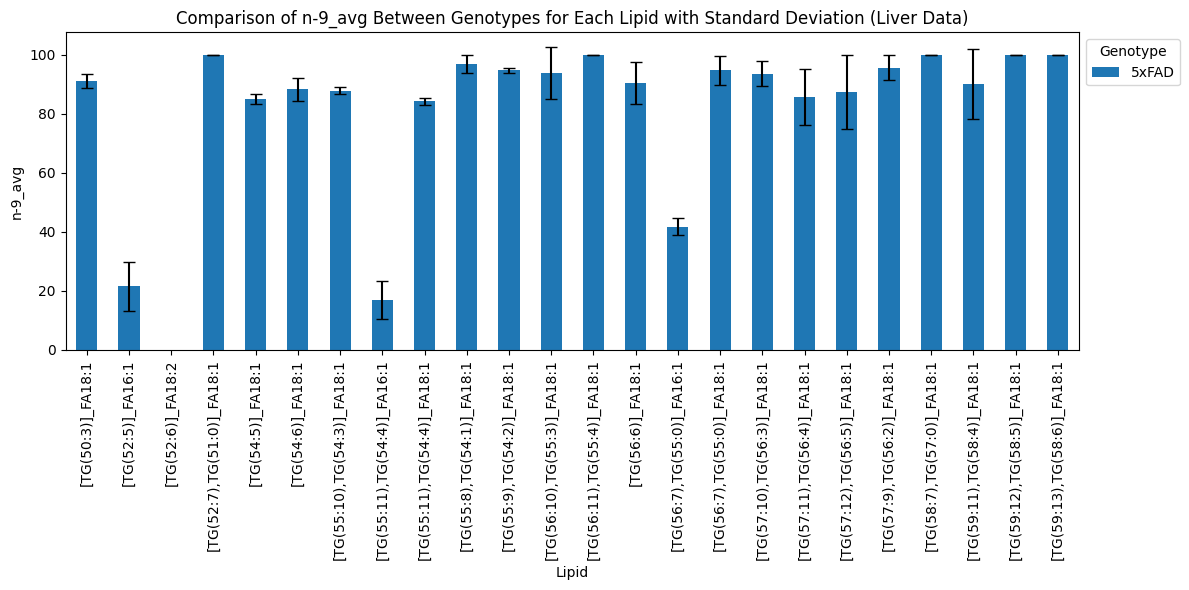

,Lipid,Genotype,n-9_avg,std_dev
0,[TG(52:5)]_FA16:1,5xFAD,21.5,8.3
12,"[TG(55:11),TG(54:4)]_FA16:1",5xFAD,16.9,6.5
19,"[TG(56:7),TG(55:0)]_FA16:1",5xFAD,41.7,2.8
27,[TG(50:3)]_FA18:1,5xFAD,91.1,2.4
37,"[TG(52:7),TG(51:0)]_FA18:1",5xFAD,100.0,0.0
39,[TG(54:5)]_FA18:1,5xFAD,85.0,1.7
50,[TG(54:6)]_FA18:1,5xFAD,88.3,3.9
60,"[TG(55:10),TG(54:3)]_FA18:1",5xFAD,87.7,1.2
73,"[TG(55:11),TG(54:4)]_FA18:1",5xFAD,84.2,1.2
85,"[TG(55:8),TG(54:1)]_FA18:1",5xFAD,96.8,3.0


In [10]:
import pandas as pd

# Assuming df3 is your DataFrame
# Create a copy of df3 to df_liver
df_liver = df3.copy()
df_liver = df_liver[df_liver['Biology'] == 'liver']

# Filter to get rows where db_pos is 'n-9'
n_9_df = df_liver[df_liver['db_pos'] == 'n-9']

# Group by Lipid and Genotype, then calculate mean and std dev of n-9%
grouped = n_9_df.groupby(['Lipid', 'Genotype'])['n-9%'].agg(['mean', 'std']).reset_index()
grouped.rename(columns={'mean': 'n-9_avg', 'std': 'std_dev'}, inplace=True)

# Merge these calculated values back to df_liver
df_liver = df_liver.merge(grouped, on=['Lipid', 'Genotype'], how='left')

# Round the values to 1 decimal place
df_liver['n-9_avg'] = df_liver['n-9_avg'].round(1)
df_liver['std_dev'] = df_liver['std_dev'].round(1)

#print out n-9_avg and std_dev for each lipid
df_liver_drop = df_liver[['Lipid', 'Genotype','n-9_avg', 'std_dev']].drop_duplicates()

# Display the last 50 rows of the DataFrame to verify the results
df_liver

# Pivot the DataFrame to have Genotype as columns
pivot_df_liver = df_liver_drop.pivot(index='Lipid', columns='Genotype', values='n-9_avg')

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
pivot_df_liver.plot(kind='bar', yerr=df_liver_drop.pivot(index='Lipid', columns='Genotype', values='std_dev'), ax=ax, capsize=4)

# Rotating x-axis labels and setting labels/title
plt.xlabel('Lipid')
plt.ylabel('n-9_avg')
plt.title('Comparison of n-9_avg Between Genotypes for Each Lipid with Standard Deviation (Liver Data)')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.legend(title='Genotype', loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside
plt.tight_layout()
plt.show()




df_liver_drop

BRAIN 5xFAD vs WT

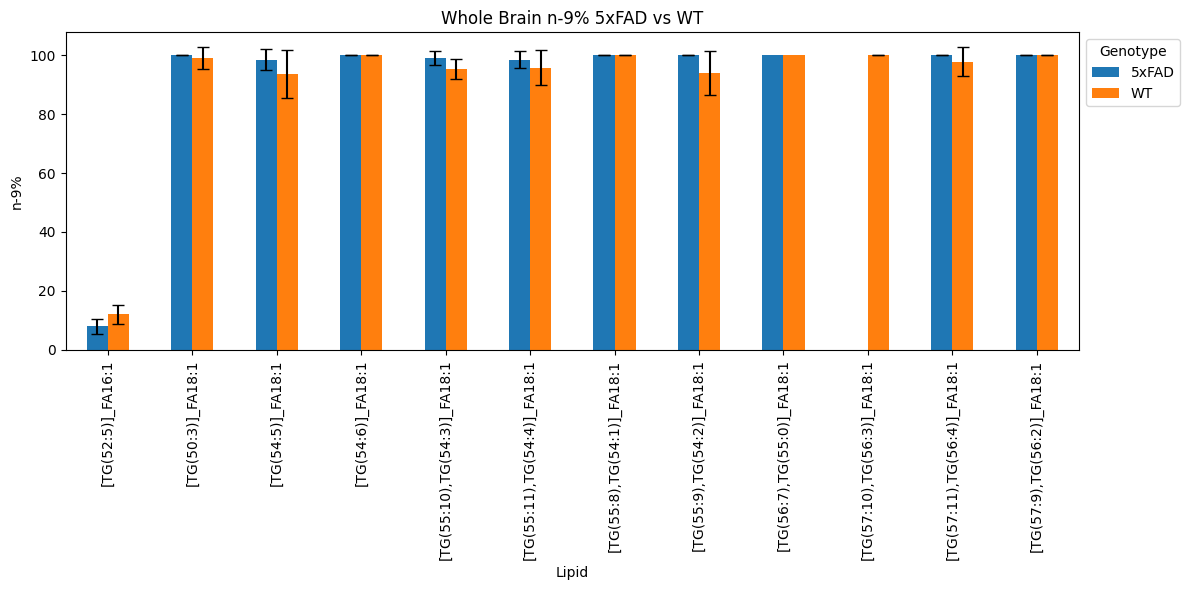

In [16]:


df_brain_drop = df_brain[['Lipid', 'Genotype','n-9_avg', 'std_dev']].drop_duplicates()


# Pivot the DataFrame to have Genotype as columns
pivot_df = df_brain_drop.pivot(index='Lipid', columns='Genotype', values='n-9_avg')
###########
# Create a sorting key based on the index (Lipid names) to bring FA16:1 lipids first, if applicable
pivot_df['Sort_Key'] = pivot_df.index.str.contains('FA16:1').astype(int)

# Sort the DataFrame based on the sorting key
pivot_df = pivot_df.sort_values(by='Sort_Key', ascending=False)

# Drop the sorting key column
pivot_df.drop('Sort_Key', axis=1, inplace=True)
############

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
pivot_df.plot(kind='bar', yerr=df_brain_drop.pivot(index='Lipid', columns='Genotype', values='std_dev'), ax=ax, capsize=4)




# Rotating x-axis labels and setting labels/title
plt.xlabel('Lipid')
plt.ylabel('n-9%')
plt.title('Whole Brain n-9% 5xFAD vs WT')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.legend(title='Genotype', loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside
plt.tight_layout()
#save figure to Barplot_OzON/9% folder
plt.savefig('Barplot_OzON/9%/Whole Brain 5xFAD vs WT.png', dpi=300)
#save as pdf
plt.savefig('Barplot_OzON/9%/Whole Brain 5xFAD vs WT.pdf', dpi=300)
plt.show()

each brain region 5xfad vs WT

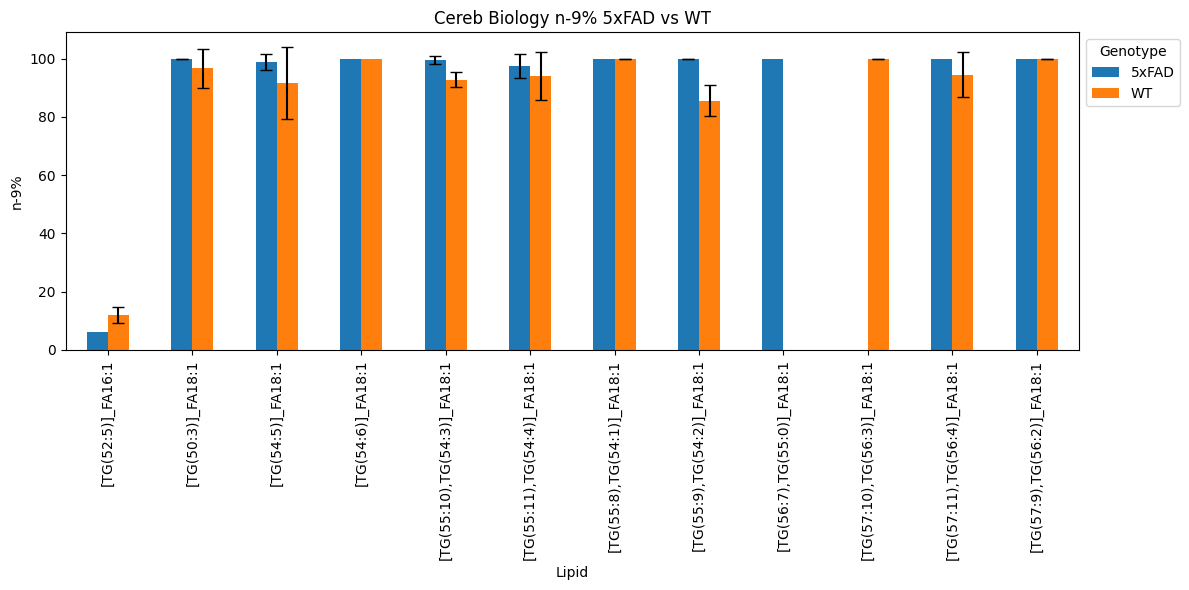

,Lipid,Genotype,n-9_avg,std_dev
0,[TG(52:5)]_FA16:1,WT,12.0,2.8
2,[TG(52:5)]_FA16:1,5xFAD,6.2,NaN
3,[TG(50:3)]_FA18:1,WT,96.7,6.6
7,[TG(50:3)]_FA18:1,5xFAD,100.0,0.0
11,[TG(54:5)]_FA18:1,WT,91.6,12.3
15,[TG(54:5)]_FA18:1,5xFAD,98.9,2.7
21,[TG(54:6)]_FA18:1,WT,100.0,NaN
22,[TG(54:6)]_FA18:1,5xFAD,100.0,NaN
23,"[TG(55:10),TG(54:3)]_FA18:1",WT,92.8,2.6
28,"[TG(55:10),TG(54:3)]_FA18:1",5xFAD,99.5,1.3


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_brain is your DataFrame from previous steps
df_cereb = df3.copy()
#filter out n-9% >0
df_cereb = df_cereb[df_cereb['n-9%'] > 0]

# Filter to include only rows where Biology is "cereb"
df_cereb = df_cereb[df_cereb['Biology'] == 'cereb']

# Group by Lipid and Genotype, then calculate mean and std dev of n-9%
grouped_cereb = df_cereb.groupby(['Lipid', 'Genotype'])['n-9%'].agg(['mean', 'std']).reset_index()
grouped_cereb.rename(columns={'mean': 'n-9_avg', 'std': 'std_dev'}, inplace=True)

# Merge these calculated values back to df_cereb
df_cereb = df_cereb.merge(grouped_cereb, on=['Lipid', 'Genotype'], how='left')

# Round the values to 1 decimal place
df_cereb['n-9_avg'] = df_cereb['n-9_avg'].round(1)
df_cereb['std_dev'] = df_cereb['std_dev'].round(1)
df_cereb



# Create a copy of df_cereb to df_cereb_drop
df_cereb_drop = df_cereb[['Lipid', 'Genotype', 'n-9_avg', 'std_dev']].drop_duplicates()

# Pivot the DataFrame to have Genotype as columns
pivot_df_cereb = df_cereb_drop.pivot(index='Lipid', columns='Genotype', values='n-9_avg')

# Create a sorting key based on the index (Lipid names) to bring FA16:1 lipids first, if applicable
pivot_df_cereb['Sort_Key'] = pivot_df_cereb.index.str.contains('FA16:1').astype(int)

# Sort the DataFrame based on the sorting key
pivot_df_cereb = pivot_df_cereb.sort_values(by='Sort_Key', ascending=False)

# Drop the sorting key column
pivot_df_cereb.drop('Sort_Key', axis=1, inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
pivot_df_cereb.plot(kind='bar', yerr=df_cereb_drop.pivot(index='Lipid', columns='Genotype', values='std_dev'), ax=ax, capsize=4)



# Rotating x-axis labels and setting labels/title
plt.xlabel('Lipid')
plt.ylabel('n-9%')
plt.title('Cereb Biology n-9% 5xFAD vs WT')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.legend(title='Genotype', loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside
plt.tight_layout()
#save figure to Barplot_OzON/9% folder
plt.savefig('Barplot_OzON/9%/Cereb 5xFAD vs WT.png', dpi=300)
#save as pdf
plt.savefig('Barplot_OzON/9%/Cereb 5xFAD vs WT.pdf', dpi=300)
plt.show()

df_cereb_drop


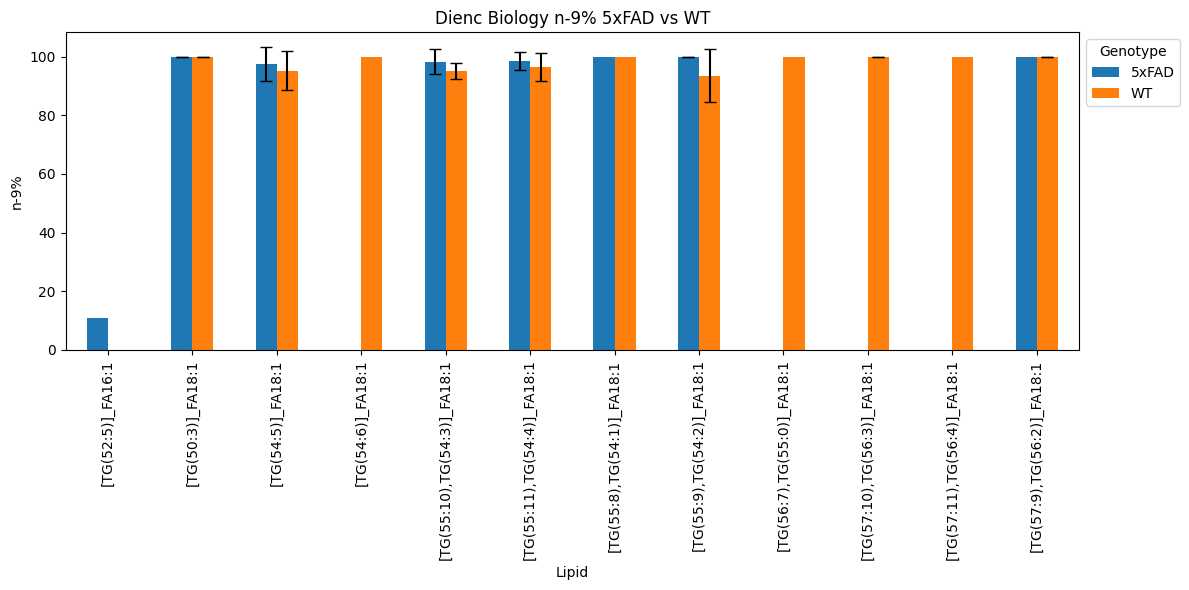

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df3 is your DataFrame
# Create a copy of df3 for the Dienc region
df_dienc = df3.copy()
df_dienc = df_dienc[(df_dienc['Biology'] == 'dienc') & (df_dienc['n-9%'] > 0)]

# Group by Lipid and Genotype, then calculate mean and std dev of n-9%
grouped_dienc = df_dienc.groupby(['Lipid', 'Genotype'])['n-9%'].agg(['mean', 'std']).reset_index()
grouped_dienc.rename(columns={'mean': 'n-9_avg', 'std': 'std_dev'}, inplace=True)

# Merge these calculated values back to df_dienc
df_dienc = df_dienc.merge(grouped_dienc, on=['Lipid', 'Genotype'], how='left')
df_dienc['n-9_avg'] = df_dienc['n-9_avg'].round(1)
df_dienc['std_dev'] = df_dienc['std_dev'].round(1)

# Create a copy of df_dienc to df_dienc_drop
df_dienc_drop = df_dienc[['Lipid', 'Genotype', 'n-9_avg', 'std_dev']].drop_duplicates()

# Pivot the DataFrame to have Genotype as columns
pivot_df_dienc = df_dienc_drop.pivot(index='Lipid', columns='Genotype', values='n-9_avg')
pivot_df_dienc['Sort_Key'] = pivot_df_dienc.index.str.contains('FA16:1').astype(int)
pivot_df_dienc = pivot_df_dienc.sort_values(by='Sort_Key', ascending=False)
pivot_df_dienc.drop('Sort_Key', axis=1, inplace=True)

# Plotting for Dienc
fig, ax = plt.subplots(figsize=(12, 6))
pivot_df_dienc.plot(kind='bar', yerr=df_dienc_drop.pivot(index='Lipid', columns='Genotype', values='std_dev'), ax=ax, capsize=4)
plt.xlabel('Lipid')
plt.ylabel('n-9%')
plt.title('Dienc Biology n-9% 5xFAD vs WT')
plt.xticks(rotation=90)
plt.legend(title='Genotype', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('Barplot_OzON/9%/Dienc 5xFAD vs WT.png', dpi=300)
#save as pdf
plt.savefig('Barplot_OzON/9%/Dienc 5xFAD vs WT.pdf', dpi=300)
plt.show()


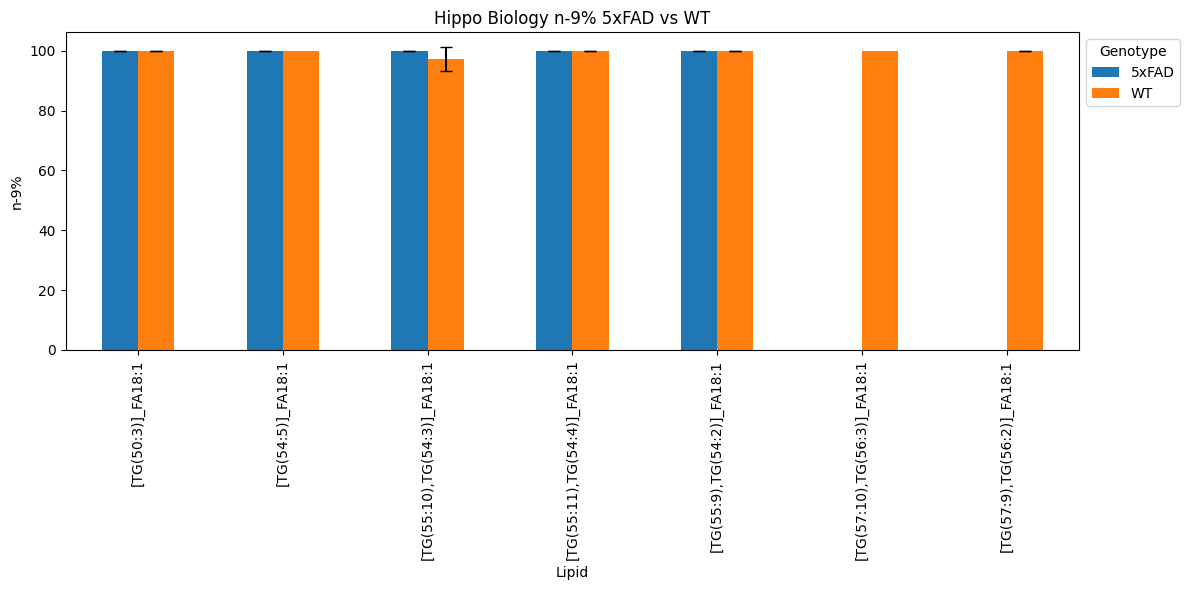

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df3 is your original DataFrame
df_hippo = df3.copy()

# Filter to include only rows where Biology is "hippo" and n-9% values are greater than 0
df_hippo = df_hippo[(df_hippo['Biology'] == 'hippo') & (df_hippo['n-9%'] > 0)]

# Group by Lipid and Genotype, then calculate mean and standard deviation of n-9%
grouped_hippo = df_hippo.groupby(['Lipid', 'Genotype'])['n-9%'].agg(['mean', 'std']).reset_index()
grouped_hippo.rename(columns={'mean': 'n-9_avg', 'std': 'std_dev'}, inplace=True)

# Merge these calculated values back to df_hippo
df_hippo = df_hippo.merge(grouped_hippo, on=['Lipid', 'Genotype'], how='left')

# Round the values to 1 decimal place
df_hippo['n-9_avg'] = df_hippo['n-9_avg'].round(1)
df_hippo['std_dev'] = df_hippo['std_dev'].round(1)

# Create a copy of df_hippo to df_hippo_drop
df_hippo_drop = df_hippo[['Lipid', 'Genotype', 'n-9_avg', 'std_dev']].drop_duplicates()

# Pivot the DataFrame to have Genotype as columns
pivot_df_hippo = df_hippo_drop.pivot(index='Lipid', columns='Genotype', values='n-9_avg')

# Create a sorting key based on the index (Lipid names) to bring FA16:1 lipids first, if applicable
pivot_df_hippo['Sort_Key'] = pivot_df_hippo.index.str.contains('FA16:1').astype(int)

# Sort the DataFrame based on the sorting key
pivot_df_hippo = pivot_df_hippo.sort_values(by='Sort_Key', ascending=False)

# Drop the sorting key column
pivot_df_hippo.drop('Sort_Key', axis=1, inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
pivot_df_hippo.plot(kind='bar', yerr=df_hippo_drop.pivot(index='Lipid', columns='Genotype', values='std_dev'), ax=ax, capsize=4)

# Rotating x-axis labels and setting labels/title
plt.xlabel('Lipid')
plt.ylabel('n-9%')
plt.title('Hippo Biology n-9% 5xFAD vs WT')
plt.xticks(rotation=90)
plt.legend(title='Genotype', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('Barplot_OzON/9%/Hippo 5xFAD vs WT.png', dpi=300)
#save as pdf    
plt.savefig('Barplot_OzON/9%/Hippo 5xFAD vs WT.pdf', dpi=300)
plt.show()


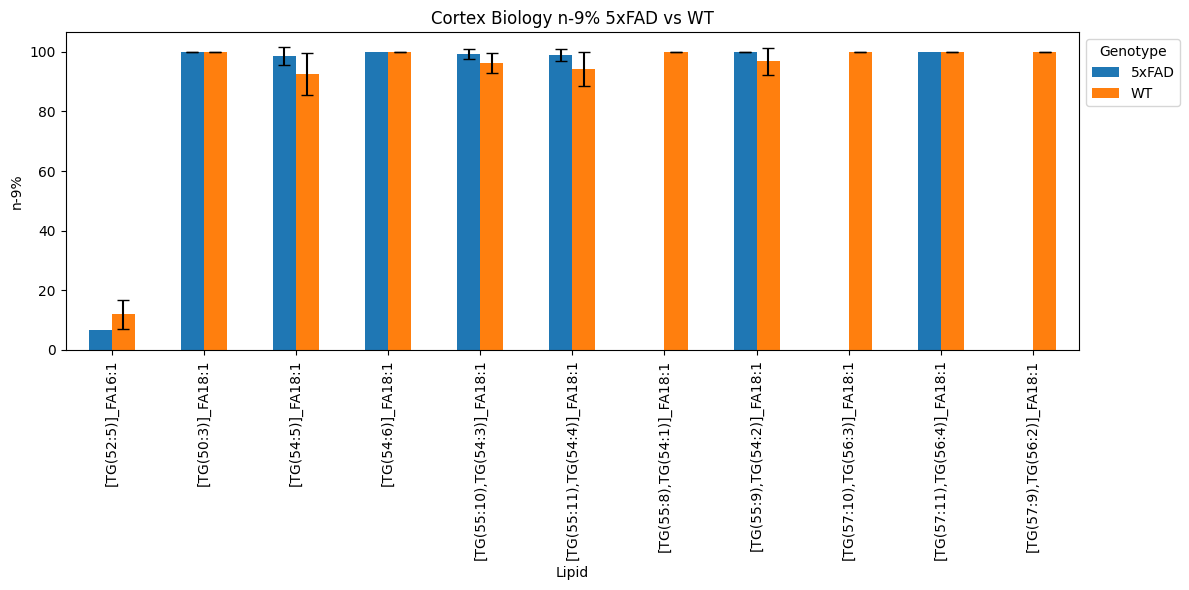

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df3 is your original DataFrame
df_cortex = df3.copy()

# Filter to include only rows where Biology is "cortex" and n-9% values are greater than 0
df_cortex = df_cortex[(df_cortex['Biology'] == 'cortex') & (df_cortex['n-9%'] > 0)]

# Group by Lipid and Genotype, then calculate mean and standard deviation of n-9%
grouped_cortex = df_cortex.groupby(['Lipid', 'Genotype'])['n-9%'].agg(['mean', 'std']).reset_index()
grouped_cortex.rename(columns={'mean': 'n-9_avg', 'std': 'std_dev'}, inplace=True)

# Merge these calculated values back to df_cortex
df_cortex = df_cortex.merge(grouped_cortex, on=['Lipid', 'Genotype'], how='left')

# Round the values to 1 decimal place
df_cortex['n-9_avg'] = df_cortex['n-9_avg'].round(1)
df_cortex['std_dev'] = df_cortex['std_dev'].round(1)

# Create a copy of df_cortex to df_cortex_drop
df_cortex_drop = df_cortex[['Lipid', 'Genotype', 'n-9_avg', 'std_dev']].drop_duplicates()

# Pivot the DataFrame to have Genotype as columns
pivot_df_cortex = df_cortex_drop.pivot(index='Lipid', columns='Genotype', values='n-9_avg')

# Create a sorting key based on the index (Lipid names) to bring FA16:1 lipids first, if applicable
pivot_df_cortex['Sort_Key'] = pivot_df_cortex.index.str.contains('FA16:1').astype(int)

# Sort the DataFrame based on the sorting key
pivot_df_cortex = pivot_df_cortex.sort_values(by='Sort_Key', ascending=False)

# Drop the sorting key column
pivot_df_cortex.drop('Sort_Key', axis=1, inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
pivot_df_cortex.plot(kind='bar', yerr=df_cortex_drop.pivot(index='Lipid', columns='Genotype', values='std_dev'), ax=ax, capsize=4)

# Rotating x-axis labels and setting labels/title
plt.xlabel('Lipid')
plt.ylabel('n-9%')
plt.title('Cortex Biology n-9% 5xFAD vs WT')
plt.xticks(rotation=90)
plt.legend(title='Genotype', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('Barplot_OzON/9%/Cortex 5xFAD vs WT.png', dpi=300)
#save as pdf
plt.savefig('Barplot_OzON/9%/Cortex 5xFAD vs WT.pdf', dpi=300)
plt.show()


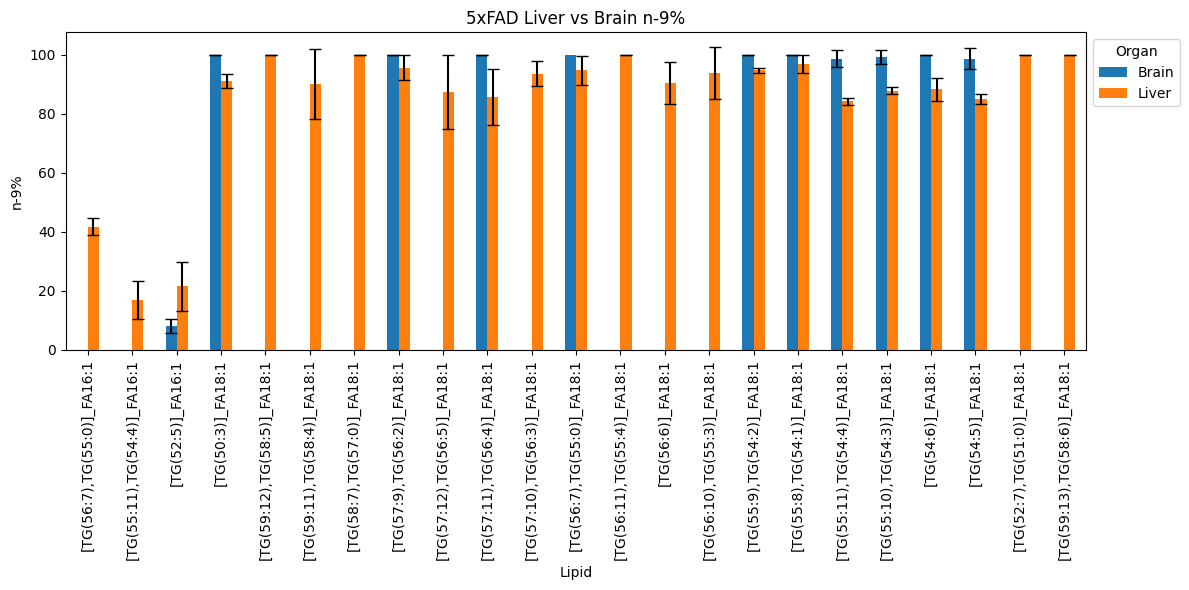

In [21]:
df_5xfad = pd.concat([df_liver, df_brain])
#delete 18:2 lipids
df_5xfad = df_5xfad[~df_5xfad['Lipid'].str.contains('FA18:2')]


# Filter the DataFrame to include only 5xFAD samples
df_5xfad = df_5xfad[df_5xfad['Genotype'] == '5xFAD']

# Create a new column 'Organ'
df_5xfad['Organ'] = df_5xfad['Biology'].apply(lambda x: 'Liver' if x == 'liver' else 'Brain')


df_5xfad_drop = df_5xfad[['Lipid', 'Organ','n-9_avg', 'std_dev']].drop_duplicates()
df_5xfad_drop.to_csv('df_5xfad_drop.csv')   


# Assuming df_5xfad_drop is created as per your code snippet

# Pivot the DataFrame to have Organ as columns
pivot_df_organ = df_5xfad_drop.pivot(index='Lipid', columns='Organ', values='n-9_avg')

# Create a sorting key based on the index (Lipid names) to bring certain lipids first, if applicable
pivot_df_organ['Sort_Key'] = pivot_df_organ.index.str.contains('FA16:1').astype(int)

# Sort the DataFrame based on the sorting key
pivot_df_organ = pivot_df_organ.sort_values(by='Sort_Key', ascending=False)

# Drop the sorting key column
pivot_df_organ.drop('Sort_Key', axis=1, inplace=True)

# Pivot the DataFrame for standard deviation values to be used as error bars
pivot_df_std_dev_organ = df_5xfad_drop.pivot(index='Lipid', columns='Organ', values='std_dev')

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
pivot_df_organ.plot(kind='bar', yerr=pivot_df_std_dev_organ, ax=ax, capsize=4)


# Rotating x-axis labels and setting labels/title
plt.xlabel('Lipid')
plt.ylabel('n-9%')
plt.title('5xFAD Liver vs Brain n-9%')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.legend(title='Organ', loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside
plt.tight_layout()
#save figure to Barplot_OzON/9% folder
plt.savefig('Barplot_OzON/9%/Liver vs Brain 5xFAD n-9%.png', dpi=300)
#save as pdf
plt.savefig('Barplot_OzON/9%/Liver vs Brain 5xFAD n-9%.pdf', dpi=300)
plt.show()
# Assuming df_5xfad_drop is defined and contains the necessary columns
# Printing out the values for each lipid and Organ combination



# Assuming df_5xfad_drop is defined and contains the necessary columns
# Printing out the values for each lipid and Organ combination

